# Reto-> Entrega 2 (18/11) -> Clasificación-ensambles y presentación ejecutiva

**Nombre 1:** Daniela Estevez Rodriguez

**Matricula 1:** A01793723
<br>
<br>

**Nombre 2:** Ernesto Nicanor Santillán Guerrero 

**Matricula 2:** A01793675



**Materia:** Ciencia y analítica de datos

**Profesor:** María de la Paz Rico Fernández

**Fecha:** 17 de Noviembre de 2022

In [1]:
# Librerías

# Para ayudar a que el código esté mejor estructurado (buenas prácticas)
%load_ext nb_black

# Para omitir los mensajes de warnings
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns

import os
import fiona

import geopandas as gpd

# from shapely.geometry import Point

from sklearn.model_selection import train_test_split

# from sklearn.model_selection import (cross_val_score,
#    cross_validate,
#    RepeatedStratifiedKFold,
#    learning_curve,
#    validation_curve)

from sklearn.preprocessing import OrdinalEncoder

# from sklearn.preprocessing import OneHotEncoder

# from sklearn.preprocessing import RobustScaler

from sklearn.impute import SimpleImputer

# from sklearn.model_selection import GridSearchCV

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# from sklearn.metrics import confusion_matrix, make_scorer

# from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

pd.options.display.max_columns = 60
pd.options.display.max_rows = 70

<IPython.core.display.Javascript object>

In [2]:
# Directorio local
path = "/Users/danielaestevezrodriguez/Documents/Educación continua y posgrados/Tec de Monterrey/2do Trimestre/Ciencia y analítica de datos/Actividades grupales/Reto _1/Datos_de_calidad_del_agua_2020/"
# path="/Users/santien/reto_1/"
os.listdir(path)

['Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_superficiales_2020.csv',
 'Escalas_superficial.csv',
 '.DS_Store',
 'Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.csv',
 'Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_superficiales_2020.kmz',
 'doc_subterraneas.kml',
 'doc_superficiales.kml',
 'Escalas_subterranea.csv',
 'Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.kmz']

<IPython.core.display.Javascript object>

In [3]:
# Documentos
file1 = "doc_subterraneas.kml"
file2 = (
    "Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.csv"
)
file3 = "Escalas_subterranea.csv"

<IPython.core.display.Javascript object>

In [4]:
# Descarga kml subterraneas
if os.path.exists(path + file1):
    fiona.drvsupport.supported_drivers["KML"] = "rw"
    df_subterraneas = gpd.read_file(path + file1, driver="KML")

# Algunos rows de subterraneas
df_subterraneas.head()

,Name,Description,geometry
0,,,POINT Z (-102.02210 22.20887 0.00000)
1,,,POINT Z (-102.20075 21.99958 0.00000)
2,,,POINT Z (-102.28801 22.36685 0.00000)
3,,,POINT Z (-102.29449 22.18435 0.00000)
4,,,POINT Z (-110.24480 23.45138 0.00000)


<IPython.core.display.Javascript object>

In [5]:
# Descarga csv calidad subterraneas
if os.path.exists(path + file2):
    df_calidad_agua_sub = pd.read_csv(path + file2, encoding="latin1")

# Algunos rows de subterraneas
df_calidad_agua_sub.head()

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,ALC_mg/L,CALIDAD_ALC,CONDUCT_mS/cm,CALIDAD_CONDUC,SDT_mg/L,SDT_M_mg/L,CALIDAD_SDT_ra,CALIDAD_SDT_salin,FLUORUROS_mg/L,CALIDAD_FLUO,DUR_mg/L,CALIDAD_DUR,COLI_FEC_NMP/100_mL,CALIDAD_COLI_FEC,N_NO3_mg/L,CALIDAD_N_NO3,AS_TOT_mg/L,CALIDAD_AS,CD_TOT_mg/L,CALIDAD_CD,CR_TOT_mg/L,CALIDAD_CR,HG_TOT_mg/L,CALIDAD_HG,PB_TOT_mg/L,CALIDAD_PB,MN_TOT_mg/L,CALIDAD_MN,FE_TOT_mg/L,CALIDAD_FE,SEMAFORO,CONTAMINANTES,CUMPLE_CON_ALC,CUMPLE_CON_COND,CUMPLE_CON_SDT_ra,CUMPLE_CON_SDT_salin,CUMPLE_CON_FLUO,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,229.990,Alta,940.0,Permisible para riego,NaN,603.6,Cultivos sensibles,Potable - Dulce,0.9766,Potable - Optima,213.732,Potable - Dura,<1.1,Potable - Excelente,4.184656,Potable - Excelente,0.0161,Apta como FAAP,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,0.0891,Potable - Excelente,Verde,NaN,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,231.990,Alta,608.0,Buena para riego,NaN,445.4,Excelente para riego,Potable - Dulce,0.9298,Potable - Optima,185.0514,Potable - Dura,<1.1,Potable - Excelente,5.75011,Potable - Buena calidad,0.0134,Apta como FAAP,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Verde,NaN,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,204.920,Alta,532.0,Buena para riego,NaN,342,Excelente para riego,Potable - Dulce,1.8045,Alta,120.719,Potable - Dura,<1.1,Potable - Excelente,1.449803,Potable - Excelente,0.037,No apta como FAAP,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Rojo,"FLUO,AS,",SI,SI,SI,SI,NO,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,327.000,Alta,686.0,Buena para riego,NaN,478.6,Excelente para riego,Potable - Dulce,1.1229,Potable - Optima,199.879,Potable - Dura,<1.1,Potable - Excelente,1.258597,Potable - Excelente,0.0154,Apta como FAAP,<0.003,Potable - Excelente,0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Verde,NaN,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,309.885,Alta,1841.0,Permisible para riego,NaN,1179,Cultivos con manejo especial,Ligeramente salobres,0.2343,Baja,476.9872,Potable - Dura,291,Aceptable,15.672251,No apta como FAAP,<0.01,Potable - Excelente,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Rojo,"NO3,",SI,SI,SI,SI,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI


<IPython.core.display.Javascript object>

In [6]:
# Descarga csv escalas subterraneas
if os.path.exists(path + file3):
    df_escala_sub = pd.read_csv(path + file3, encoding="latin1")

# Algunos rows de subterraneas
df_escala_sub.head()

,CALIDAD DEL AGUA PARA COLIFORMES FECALES_subterraneas,CRITERIO,DESCRIPCION
0,Excelente,COLI_FEC menor a 1.1,Agua potable. Agua no contaminada o condicion ...
1,Buena calidad,COLI_FEC mayor o igual de 1.1 y menor o igual ...,Aguas para uso recreativo con contacto primari...
2,Aceptable,COLI_FEC mayor de 200 y menor o igual a 1000,Aguas con calidad admisible como fuente de aba...
3,Contaminada,COLI_FEC mayor de 1000 y menor o igual a 10000,Aguas con contaminacion bacteriologica. Indic...
4,Fuertemente contaminada,COLI_FEC mayor de 10000,Aguas con fuerte contaminacion bacteriologica....


<IPython.core.display.Javascript object>

## Limpieza de base de datos.

**Omitimos la exploración de datos realizada en la entrega anterior**

**Eliminamos variable que no nos sirven**

In [7]:
# eliminar columna con puros nulls
df_calidad_agua_sub.drop("SDT_mg/L", axis=1, inplace=True)

# eliminar columna que no nos dan información porque son claves únicas
df_calidad_agua_sub.drop("CLAVE", axis=1, inplace=True)

# eliminar columna que no nos dan información porque casi todos son valores únicos (solo se repite 1)
df_calidad_agua_sub.drop("SITIO", axis=1, inplace=True)

# eliminar columna que no nos dan información porque solo toma un valor
df_calidad_agua_sub.drop("PERIODO", axis=1, inplace=True)

<IPython.core.display.Javascript object>

**Conversión de columnas a numéricas**

In [8]:
def convert_to_numeric(item):
    if type(item) == str:
        item = item.strip("<")
    return float(item)

<IPython.core.display.Javascript object>

In [9]:
# Columnas para convertir en numericas
col_a_numeric = [
    item
    for item in df_calidad_agua_sub.loc[:, "SDT_M_mg/L":"FE_TOT_mg/L"].columns
    if "CALIDAD" not in item
]

<IPython.core.display.Javascript object>

In [10]:
# Convertimos columnas a numericas
for col in col_a_numeric:
    df_calidad_agua_sub[col] = df_calidad_agua_sub[col].apply(convert_to_numeric)

<IPython.core.display.Javascript object>

**Cambiar a ordinales las variables de calidad**

Se realizara en a traves de un pipeline con el apoyo de OrdinalEncoder.

**Datos faltantes**

Usaremos un pipeline para evitar data leaking al rellenar datos faltates.

- Datos numericos usaremos mediana.
- Variable CONTAMINANTES usaremos "Ninguno".
- Variables binarias, categóricas y ordinales usaremos la moda.

**Codificar las variables categóricas para convertirlas a numericas**

Debido a la cantidad de valores que toman (la que menos es SUBTIPO y toma 8 valores) usaremos OrdinalEncoder en vez de OneHotEncoder. La transformación se realizará dentro de un pipeline.

**Escalamiento de datos**

No es necesario ya que ni los árboles de decisión ni los bosques aleatorios se ven afectados por rango distinto u outliers.

## 1. Selecciona tus variables independientes X y dependiente Y (semáforo)

In [12]:
# Definamos las variables de entrada y de salida
X = pd.concat(
    [df_calidad_agua_sub.iloc[:, :36], df_calidad_agua_sub.iloc[:, 37:]], axis=1
).copy()
Y = df_calidad_agua_sub[["SEMAFORO"]]

<IPython.core.display.Javascript object>

## 2. Cambia a label encoding el semáforo, ej, de ["clase 1", "clase 2", "clase 3"] a [ 1,2,3]

Realizamos la transformación a través de un pipeline apoyados de OrdinalEncoder.

**Pipeline para SEMAFORO**

In [13]:
# Pipeline para variable y
y_pipeline = Pipeline(steps=[("OrdE", OrdinalEncoder())])
y_pipeline_nombres = ["SEMAFORO"]

<IPython.core.display.Javascript object>

In [17]:
# Transformamos variable SEMAFORO
Yy = y_pipeline.fit_transform(Y)

<IPython.core.display.Javascript object>

**Pipeline para X**

In [19]:
# Pipeline para  variables numéricas
num_pipeline = Pipeline(steps=[("imputer", SimpleImputer(strategy="median"))])
num_pipeline_nombres = [
    "LONGITUD",
    "LATITUD",
    "ALC_mg/L",
    "CONDUCT_mS/cm",
    "SDT_M_mg/L",
    "FLUORUROS_mg/L",
    "DUR_mg/L",
    "COLI_FEC_NMP/100_mL",
    "N_NO3_mg/L",
    "AS_TOT_mg/L",
    "CD_TOT_mg/L",
    "CR_TOT_mg/L",
    "HG_TOT_mg/L",
    "PB_TOT_mg/L",
    "MN_TOT_mg/L",
    "FE_TOT_mg/L",
]

# Pipeline para variables CONTAMINANTES
cont_pipeline = Pipeline(
    steps=[
        ("imputer1", SimpleImputer(strategy="constant", fill_value="Ninguno")),
        (
            "OrdE",
            OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=np.nan),
        ),
        ("imputer2", SimpleImputer(strategy="most_frequent")),
    ]
)
cont_pipeline_nombres = ["CONTAMINANTES"]

# Pipeline para variables categóricas
cat_pipeline = Pipeline(
    steps=[
        ("imputer1", SimpleImputer(strategy="most_frequent")),
        (
            "OrdE",
            OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=np.nan),
        ),
        ("imputer2", SimpleImputer(strategy="most_frequent")),
    ]
)
cat_pipeline_nombres = [
    "ORGANISMO_DE_CUENCA",
    "ESTADO",
    "MUNICIPIO",
    "ACUIFERO",
    "SUBTIPO",
]

# Pipeline para  variables ordinales
ord_pipeline = Pipeline(
    steps=[
        ("imputer1", SimpleImputer(strategy="most_frequent")),
        (
            "OrdE",
            OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=np.nan),
        ),
        ("imputer2", SimpleImputer(strategy="most_frequent")),
    ]
)
ord_pipeline_nombres = [
    "CALIDAD_ALC",
    "CALIDAD_CONDUC",
    "CALIDAD_SDT_ra",
    "CALIDAD_SDT_salin",
    "CALIDAD_FLUO",
    "CALIDAD_DUR",
    "CALIDAD_COLI_FEC",
    "CALIDAD_N_NO3",
    "CALIDAD_AS",
    "CALIDAD_CD",
    "CALIDAD_CR",
    "CALIDAD_HG",
    "CALIDAD_PB",
    "CALIDAD_MN",
    "CALIDAD_FE",
    "CUMPLE_CON_ALC",
    "CUMPLE_CON_COND",
    "CUMPLE_CON_SDT_ra",
    "CUMPLE_CON_SDT_salin",
    "CUMPLE_CON_FLUO",
    "CUMPLE_CON_DUR",
    "CUMPLE_CON_CF",
    "CUMPLE_CON_NO3",
    "CUMPLE_CON_AS",
    "CUMPLE_CON_CD",
    "CUMPLE_CON_CR",
    "CUMPLE_CON_HG",
    "CUMPLE_CON_PB",
    "CUMPLE_CON_MN",
    "CUMPLE_CON_FE",
]

# Conjuntamos las transformaciones numéricas, categóricas, ordinales y binarias que se estarán aplicando a los datos de entrada:
columnasTransformer = ColumnTransformer(
    transformers=[
        ("numerica", num_pipeline, num_pipeline_nombres),
        ("contaminantes", cont_pipeline, cont_pipeline_nombres),
        ("categorica", cat_pipeline, cat_pipeline_nombres),
        ("ordinaria", ord_pipeline, ord_pipeline_nombres),
    ],
    remainder="passthrough",
)

<IPython.core.display.Javascript object>

## 3. Realiza un análisis general de las features importances a traves de decision trees o random forest.

In [20]:
# Se crea el objeto del modelo
tree = Pipeline(
    steps=[("ct", columnasTransformer), ("m", DecisionTreeClassifier(random_state=1))]
)

# Se entrena el modelo
tree.fit(X, Yy)

Pipeline(steps=[('ct',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numerica',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['LONGITUD', 'LATITUD',
                                                   'ALC_mg/L', 'CONDUCT_mS/cm',
                                                   'SDT_M_mg/L',
                                                   'FLUORUROS_mg/L', 'DUR_mg/L',
                                                   'COLI_FEC_NMP/100_mL',
                                                   'N_NO3_mg/L', 'AS_TOT_mg/L',
                                                   'CD_TOT_mg/L', 'CR_TOT_mg/L',
                                                   'HG_TOT_mg/L', 'PB_TOT_mg/L',
                                                   'M...


<IPython.core.display.Javascript object>

In [21]:
# Importancia de variables
print(
    pd.DataFrame(
        tree["m"].feature_importances_, columns=["Imp"], index=X.columns
    ).sort_values(by="Imp", ascending=False)
)

                           Imp
DUR_mg/L              0.652072
CUMPLE_CON_FLUO       0.121491
CUMPLE_CON_NO3        0.076984
MUNICIPIO             0.046079
CUMPLE_CON_CR         0.027445
ALC_mg/L              0.025138
CONDUCT_mS/cm         0.024890
ESTADO                0.009341
CALIDAD_SDT_salin     0.005550
CUMPLE_CON_CD         0.002867
CALIDAD_SDT_ra        0.002840
CUMPLE_CON_CF         0.002781
ACUIFERO              0.002521
FE_TOT_mg/L           0.000000
CUMPLE_CON_COND       0.000000
CALIDAD_MN            0.000000
CALIDAD_FE            0.000000
MN_TOT_mg/L           0.000000
CONTAMINANTES         0.000000
CUMPLE_CON_ALC        0.000000
ORGANISMO_DE_CUENCA   0.000000
CUMPLE_CON_SDT_ra     0.000000
CUMPLE_CON_SDT_salin  0.000000
CUMPLE_CON_DUR        0.000000
PB_TOT_mg/L           0.000000
CUMPLE_CON_AS         0.000000
CUMPLE_CON_HG         0.000000
CUMPLE_CON_PB         0.000000
CUMPLE_CON_MN         0.000000
CALIDAD_PB            0.000000
CR_TOT_mg/L           0.000000
CALIDAD_

<IPython.core.display.Javascript object>

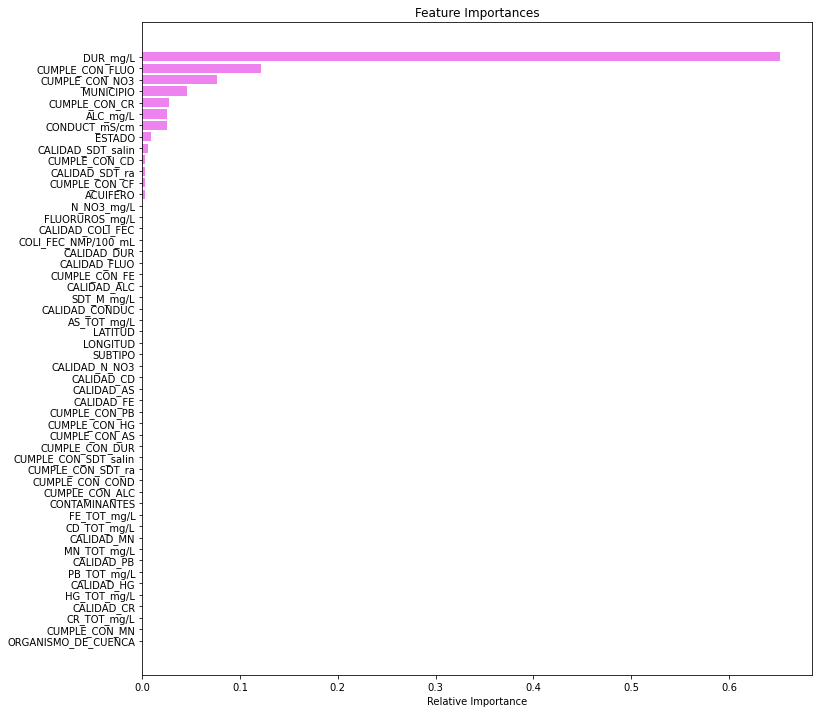

<IPython.core.display.Javascript object>

In [22]:
# Lista de nombres de variables
feature_names = list(X.columns)

# Gráfico de importancia de variables
importances = tree["m"].feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## 4. Selecciona las variables de mayor importancia.

Como se observa en el gráfico anterior las variables de mayor importancia son DUR_mg/L, CUMPLE_CON_FLUO, CUMPLE_CON_NO3 y MUNICIPIO.

## 5. Realiza tu clasificador, recuerda dividir los datos de manera balanceada (auxiliate de train test split).

In [23]:
# Definimos los conjuntos de entrenamiento y prueba con una partición de 85-15
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20)

<IPython.core.display.Javascript object>

In [24]:
print("Datos completos\n\n", Y.value_counts(normalize=True), "\n\n")
print("Datos de entreamiento\n\n", y_train.value_counts(normalize=True), "\n\n")
print("Datos de prueba\n\n", y_test.value_counts(normalize=True))

Datos completos

 SEMAFORO
Verde       0.406367
Rojo        0.362360
Amarillo    0.231273
dtype: float64 


Datos de entreamiento

 SEMAFORO
Verde       0.406323
Rojo        0.367681
Amarillo    0.225995
dtype: float64 


Datos de prueba

 SEMAFORO
Verde       0.406542
Rojo        0.341121
Amarillo    0.252336
dtype: float64


<IPython.core.display.Javascript object>

**Obs:**
- Notamos que la clase más comun es 2 con el 41%, seguido de 0 con el 36% y por último 1 con el 23%

### Árbol de decisión (hiperparámetros de default)

In [25]:
# Se transforma y de entrenamiento
y_pipeline.fit(y_train)
y_train2 = y_pipeline.fit_transform(y_train)

# Se entrena el modelo con datos de entrenamiento
tree.fit(X_train, y_train2)

Pipeline(steps=[('ct',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numerica',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['LONGITUD', 'LATITUD',
                                                   'ALC_mg/L', 'CONDUCT_mS/cm',
                                                   'SDT_M_mg/L',
                                                   'FLUORUROS_mg/L', 'DUR_mg/L',
                                                   'COLI_FEC_NMP/100_mL',
                                                   'N_NO3_mg/L', 'AS_TOT_mg/L',
                                                   'CD_TOT_mg/L', 'CR_TOT_mg/L',
                                                   'HG_TOT_mg/L', 'PB_TOT_mg/L',
                                                   'M...


<IPython.core.display.Javascript object>

### Bosque aleatorio (hiperparámetros de default)

In [27]:
# Se crea el objeto de bosque aleatorio
rf = Pipeline(
    steps=[("ct", columnasTransformer), ("m", RandomForestClassifier(random_state=1))]
)

# Se entrena el modelo con datos de entrenamiento
rf.fit(X_train, y_train2)

Pipeline(steps=[('ct',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numerica',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['LONGITUD', 'LATITUD',
                                                   'ALC_mg/L', 'CONDUCT_mS/cm',
                                                   'SDT_M_mg/L',
                                                   'FLUORUROS_mg/L', 'DUR_mg/L',
                                                   'COLI_FEC_NMP/100_mL',
                                                   'N_NO3_mg/L', 'AS_TOT_mg/L',
                                                   'CD_TOT_mg/L', 'CR_TOT_mg/L',
                                                   'HG_TOT_mg/L', 'PB_TOT_mg/L',
                                                   'M...


<IPython.core.display.Javascript object>

## 6. Explora que clasificador es el más optimo, ejemplo:

### a) Decision trees.

### b) Random Forest.

## 7. Determina el grado de exactitud a través del reporte de clasificación.

## 8. Visualiza los resultados del modelo o las predicciones a través de una matriz de confusión.